<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/video_notebooks/02_pytorch_classification_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. <a id='toc1_'></a>[Neural Network classification with PyTorch](#toc0_)

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

* Book version of this notebook - https://www.learnpytorch.io/02_pytorch_classification/
* All other resources - https://github.com/mrdbourke/pytorch-deep-learning
* Stuck? Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

**Table of contents**<a id='toc0_'></a>    
- 1. [Neural Network classification with PyTorch](#toc1_)    
  - 1.1. [Check the software and OS version](#toc1_1_)    
  - 1.2. [Make Binary classification data and get it ready](#toc1_2_)    
    - 1.2.1. [Visualize data](#toc1_2_1_)    
    - 1.2.2. [Check input and output shapes](#toc1_2_2_)    
    - 1.2.3. [Turn data into tensors and create train and test splits](#toc1_2_3_)    
    - 1.2.4. [Building a model](#toc1_2_4_)    
      - 1.2.4.1. [Setup loss function and optimizer](#toc1_2_4_1_)    
    - 1.2.5. [Train model](#toc1_2_5_)    
      - 1.2.5.1. [Going from raw logits -> prediction probabilities -> prediction labels](#toc1_2_5_1_)    
      - 1.2.5.2. [Building a training and testing loop](#toc1_2_5_2_)    
    - 1.2.6. [Make predictions and evaluate the model](#toc1_2_6_)    
    - 1.2.7. [Improving a model (from a model perspective)](#toc1_2_7_)    
    - 1.2.8. [Preparing data to see if our model can fit a straight line](#toc1_2_8_)    
      - 1.2.8.1. [Adjusting `model_1` to fit a straight line](#toc1_2_8_1_)    
  - 1.3. [The missing piece: non-linearity](#toc1_3_)    
    - 1.3.1. [Recreating non-linear data (red and blue circles)](#toc1_3_1_)    
    - 1.3.2. [Building a model with non-linearity](#toc1_3_2_)    
    - 1.3.3. [Training a model with non-linearity](#toc1_3_3_)    
    - 1.3.4. [Evaluating a model trained with non-linear activation functions](#toc1_3_4_)    
    - 1.3.5. [Replicating non-linear activation functions](#toc1_3_5_)    
  - 1.4. [Putting it all together with a multi-class classification problem](#toc1_4_)    
    - 1.4.1. [Creating a toy multi-class dataset](#toc1_4_1_)    
    - 1.4.2. [Building a multi-class classification model in PyTorch](#toc1_4_2_)    
    - 1.4.3. [Create a loss function and an optimizer for a multi-class classification model](#toc1_4_3_)    
    - 1.4.4. [Getting prediction probabilities for a multi-class PyTorch model](#toc1_4_4_)    
    - 1.4.5. [Creating a training loop and testing loop for a multi-class PyTorch model](#toc1_4_5_)    
    - 1.4.6. [Making and evaluating predictions with a PyTorch multi-class model](#toc1_4_6_)    
    - 1.4.7. [A few more classification metrics... (to evaluate our classification model)](#toc1_4_7_)    
  - 1.5. [Exercises & Extra-curriculum](#toc1_5_)    
    - 1.5.1. [Make a binary classification dataset with Scikit-Learn's `make_moons()` function.         ](#toc1_5_1_)    
      - 1.5.1.1. [Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.](#toc1_5_1_1_)    
      - 1.5.1.2. [Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.](#toc1_5_1_2_)    
      - 1.5.1.3. [Create a training and testing loop to fit the model you created in 2 to the data you created in 1.](#toc1_5_1_3_)    
      - 1.5.1.4. [Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.](#toc1_5_1_4_)    
    - 1.5.2. [Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.](#toc1_5_2_)    
    - 1.5.3. [Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).         ](#toc1_5_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1.1. <a id='toc1_1_'></a>[Check the software and OS version](#toc0_)

In [2]:
# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-06-21 11:14:28.041921


In [3]:
# Check to see if we're using a GPU
!nvidia-smi

Wed Jun 21 11:14:30 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.41.03              Driver Version: 530.41.03    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX 6000 Ada Gener...    Off| 00000000:01:00.0 Off |                  Off |
| 30%   44C    P8               28W / 300W|    482MiB / 49140MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

```
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.41.03              Driver Version: 530.41.03    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX 6000 Ada Gener...    Off| 00000000:01:00.0 Off |                  Off |
| 30%   44C    P8               28W / 300W|    482MiB / 49140MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+----------------------+
|   1  NVIDIA RTX A6000                Off| 00000000:04:00.0 Off |                  Off |
| 30%   40C    P8               24W / 300W|     15MiB / 49140MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+----------------------+
```

In [4]:
# Check your software and os version
import os
print("posix = Linux, nt = windows, java = java")
print("your os name is",os.name)

import platform
print("your os is ",platform.system()+platform.release())

from platform import python_version
print("python version is",python_version())

import torch
print("Pytorch version is",torch.__version__)

print("Are we using a GPU?",torch.cuda.is_available())

posix = Linux, nt = windows, java = java
your os name is posix
your os is  Linux5.15.0-73-generic
python version is 3.9.16
Pytorch version is 2.0.1+cu118
Are we using a GPU? True


```
posix = Linux, nt = windows, java = java
your os name is posix
your os is  Linux5.15.0-73-generic
python version is 3.9.16
Pytorch version is 2.0.1+cu118
Are we using a GPU? True
```

## 1.2. <a id='toc1_2_'></a>[Make Binary classification data and get it ready](#toc0_)

In [6]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [7]:
len(X),len(y)

(1000, 1000)

In [8]:
print(f"First 5 smaple of X:\n{X[:5]}")
print(f"First 5 smaple of y:\n{y[:5]}")

First 5 smaple of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 smaple of y:
[1 1 1 1 0]


In [10]:
# Make dataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [11]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

### 1.2.1. <a id='toc1_2_1_'></a>[Visualize data](#toc0_)

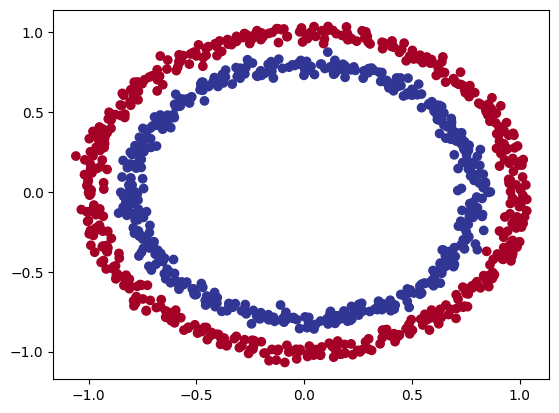

In [13]:
# Visualize, Visualize, Visualize
# reference: https://realpython.com/visualizing-python-plt-scatter/
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], 
            y=X[:,1], 
            c=y, 
            cmap=plt.cm.RdYlBu)

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals. - https://scikit-learn.org/stable/datasets/toy_dataset.html

### 1.2.2. <a id='toc1_2_2_'></a>[Check input and output shapes](#toc0_)

In [14]:
X.shape, y.shape

((1000, 2), (1000,))

### 1.2.3. <a id='toc1_2_3_'></a>[Turn data into tensors and create train and test splits](#toc0_)

In [15]:
# Import library
import torch

In [16]:
# Checking data type
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [17]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

type(X[:5]), type(y[:5])

(torch.Tensor, torch.Tensor)

In [18]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [19]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,  
                                                    random_state=42)

In [20]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [21]:
n_samples

1000

### 1.2.4. <a id='toc1_2_4_'></a>[Building a model](#toc0_)

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [22]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`

In [23]:
X_train.shape

torch.Size([800, 2])

In [24]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [25]:
from sklearn import datasets
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Creaate 2 nn.Linear Layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # take in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # take in features from previous Layer and outputs a single

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x))    # x -> Layer_1 -> Layer_2 -> output
    
# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [27]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [28]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2000, -0.1598],
                      [ 0.2864,  0.1645],
                      [ 0.2058,  0.3563],
                      [-0.5403,  0.1315],
                      [ 0.6061, -0.0989]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3998,  0.1749, -0.1759, -0.1338, -0.4133], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0344,  0.2007,  0.0439, -0.0757,  0.3226]], device='cuda:0')),
             ('1.bias', tensor([0.1666], device='cuda:0'))])

In [29]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device)).squeeze()
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([-0., 0., -0., -0., 0., 0., 0., 0., -0., 0.], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


#### 1.2.4.1. <a id='toc1_2_4_1_'></a>[Setup loss function and optimizer](#toc0_)

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures how *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For some common choices of loss functions and optimizers - https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer
* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, check out this article - https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a 
* For a defintion on what a logit is in deep learning - https://stackoverflow.com/a/52111173/7900723 
* For different optimizers see `torch.optim`

In [30]:
# Setup the loss function
# Loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
# Reference: https://blog.csdn.net/qq_22210253/article/details/85222093
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [31]:
# Calculate accurary - out of 100 example, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()  # torch.eq(): https://pytorch.org/docs/stable/generated/torch.eq.html
                                                        # item(): https://pytorch.org/docs/stable/generated/torch.Tensor.item.html
    acc = (correct/len(y_pred)) * 100
    return acc

### 1.2.5. <a id='toc1_2_5_'></a>[Train model](#toc0_)

To train our model, we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent) 

#### 1.2.5.1. <a id='toc1_2_5_1_'></a>[Going from raw logits -> prediction probabilities -> prediction labels](#toc0_)

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [32]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0508],
        [ 0.0736],
        [-0.1646],
        [-0.0195],
        [ 0.1726]], device='cuda:0')

In [33]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [34]:
# Use sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4873],
        [0.5184],
        [0.4589],
        [0.4951],
        [0.5430]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [35]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs) # Convert the values to 0 and 1
print("y_preds = ",y_preds)

# In full (logit -> pred prob -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print("y_pred_labels = ",y_pred_labels)

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
print(y_preds.squeeze())

y_preds =  tensor([[0.],
        [1.],
        [0.],
        [0.],
        [1.]], device='cuda:0')
y_pred_labels =  tensor([[0.],
        [1.],
        [0.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)
tensor([True, True, True, True, True], device='cuda:0')
tensor([0., 1., 0., 0., 1.], device='cuda:0')


In [36]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

#### 1.2.5.2. <a id='toc1_2_5_2_'></a>[Building a training and testing loop](#toc0_)

In [37]:
torch.manual_seed(42)
torch.cuda.manual_seed(42) 

# If you are working with a multi-GPU model, this function is insufficient to get determinism. To seed all GPUs, use manual_seed_all().

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    # ==========Training==========
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))   # turn logits -> pred probs -> pre labels

    # 2. Calculate loss/ accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), y_train)  # nn.BCELoss expect prediction probabilities as input
    loss = loss_fn(y_logits, y_train)   # nn.BCEWithLogitsLoss expects raw logits as 
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # ==========Testing==========
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69769, Acc: 51.12% | Test loss: 0.70177, Test acc: 51.00%
Epoch: 10 | Loss: 0.69441, Acc: 50.38% | Test loss: 0.69679, Test acc: 49.50%
Epoch: 20 | Loss: 0.69328, Acc: 48.88% | Test loss: 0.69347, Test acc: 45.50%
Epoch: 30 | Loss: 0.69555, Acc: 50.75% | Test loss: 0.69402, Test acc: 50.00%
Epoch: 40 | Loss: 0.69537, Acc: 49.50% | Test loss: 0.69419, Test acc: 49.00%
Epoch: 50 | Loss: 0.69367, Acc: 49.75% | Test loss: 0.69437, Test acc: 50.00%
Epoch: 60 | Loss: 0.69311, Acc: 52.38% | Test loss: 0.69574, Test acc: 47.50%
Epoch: 70 | Loss: 0.69344, Acc: 50.50% | Test loss: 0.69722, Test acc: 48.00%
Epoch: 80 | Loss: 0.69376, Acc: 49.62% | Test loss: 0.69729, Test acc: 49.00%
Epoch: 90 | Loss: 0.69310, Acc: 51.50% | Test loss: 0.69499, Test acc: 47.00%


### 1.2.6. <a id='toc1_2_6_'></a>[Make predictions and evaluate the model](#toc0_)

From the metrics it looks like our model isn't learning anything... 

So to inspect it let's make some predictions and make them visual! 

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py 

In [38]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("help_function.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

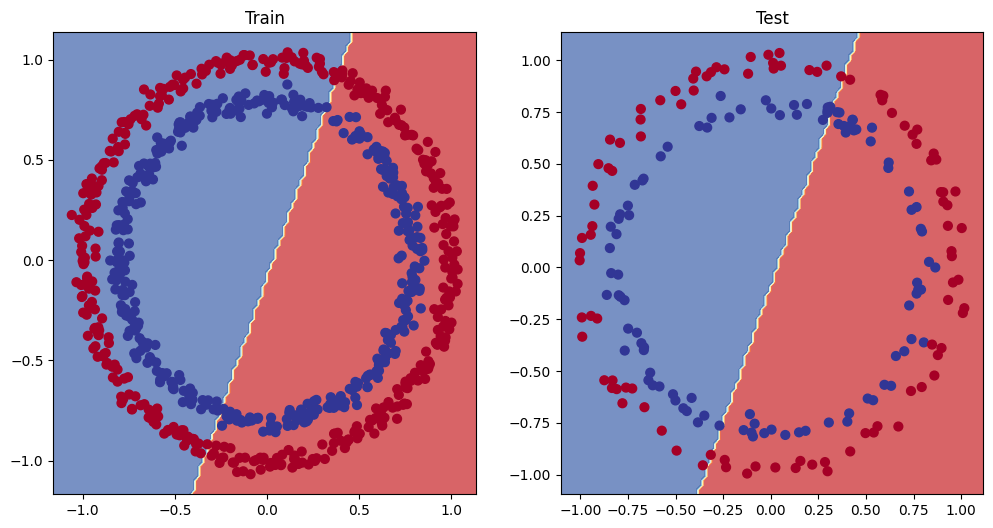

In [39]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test) 

### 1.2.7. <a id='toc1_2_7_'></a>[Improving a model (from a model perspective)](#toc0_)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units 
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function 

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [40]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [41]:
# Create a model
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=20)
        self.layer_3 = nn.Linear(in_features=20, out_features=1)

    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z) 
        return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=1, bias=True)
)

In [42]:

# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer 
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

In [43]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42) 

# If you are working with a multi-GPU model, this function is insufficient to get determinism. To seed all GPUs, use manual_seed_all().

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    # ==========Training==========
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

    # 2. Calculate loss/ accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), y_train)  # nn.BCELoss expect prediction probabilities as input
    loss = loss_fn(y_logits, y_train)   # nn.BCEWithLogitsLoss expects raw logits as 
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # ==========Testing==========
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69460, Acc: 51.62% | Test loss: 0.69721, Test acc: 49.50%
Epoch: 10 | Loss: 0.69361, Acc: 45.88% | Test loss: 0.69613, Test acc: 47.00%
Epoch: 20 | Loss: 0.69429, Acc: 59.25% | Test loss: 0.69475, Test acc: 53.00%
Epoch: 30 | Loss: 0.69381, Acc: 50.00% | Test loss: 0.69332, Test acc: 50.00%
Epoch: 40 | Loss: 0.69402, Acc: 51.25% | Test loss: 0.69384, Test acc: 55.00%
Epoch: 50 | Loss: 0.69369, Acc: 47.25% | Test loss: 0.69671, Test acc: 46.00%
Epoch: 60 | Loss: 0.69417, Acc: 53.25% | Test loss: 0.69881, Test acc: 47.50%
Epoch: 70 | Loss: 0.69387, Acc: 48.25% | Test loss: 0.69714, Test acc: 48.50%
Epoch: 80 | Loss: 0.69352, Acc: 50.00% | Test loss: 0.69369, Test acc: 50.00%
Epoch: 90 | Loss: 0.69382, Acc: 45.12% | Test loss: 0.69296, Test acc: 50.00%
Epoch: 100 | Loss: 0.69337, Acc: 49.88% | Test loss: 0.69268, Test acc: 51.00%
Epoch: 110 | Loss: 0.69325, Acc: 50.00% | Test loss: 0.69396, Test acc: 51.50%
Epoch: 120 | Loss: 0.69360, Acc: 46.88% | Test loss: 0.69587, T

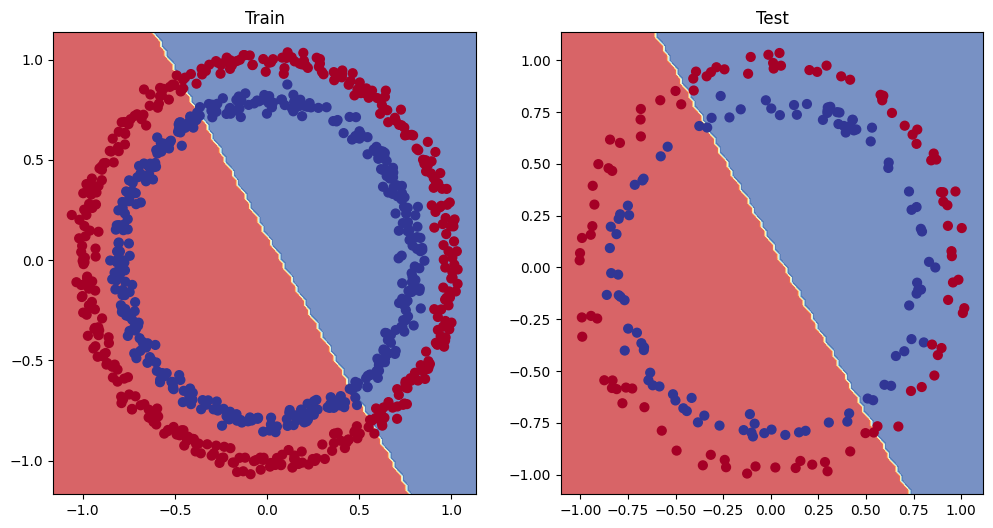

In [44]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test) 

### 1.2.8. <a id='toc1_2_8_'></a>[Preparing data to see if our model can fit a straight line](#toc0_)

One way to troubleshoot to a larger problem is to test out a smaller problem.

In [45]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [46]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

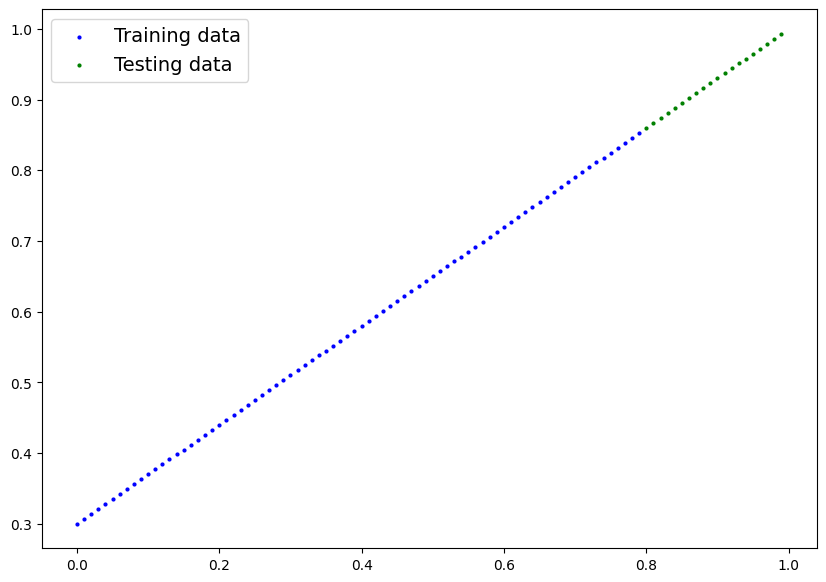

In [47]:
plot_predictions(train_data=X_train_regression, 
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

#### 1.2.8.1. <a id='toc1_2_8_1_'></a>[Adjusting `model_1` to fit a straight line](#toc0_)

In [48]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
# Loss and optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                            lr=0.01)

In [50]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


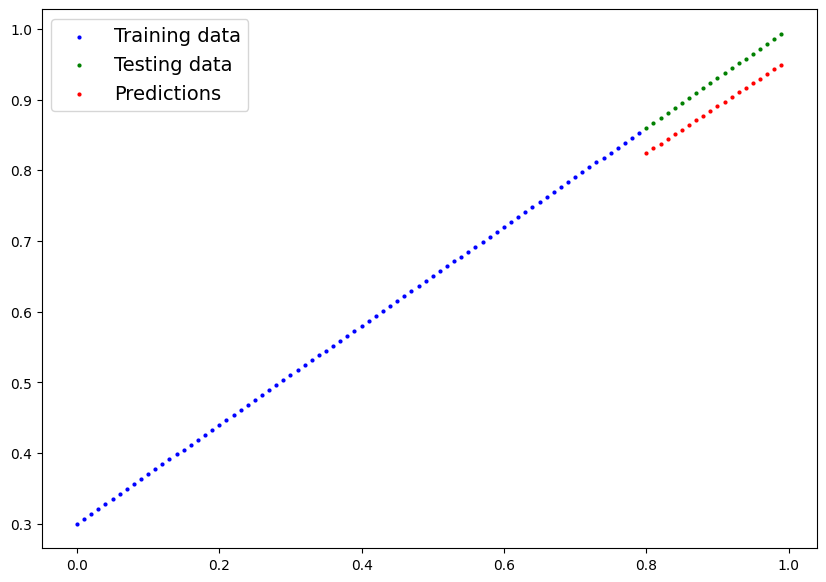

In [51]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(), 
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu()); 

## 1.3. <a id='toc1_3_'></a>[The missing piece: non-linearity](#toc0_)

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 1.3.1. <a id='toc1_3_1_'></a>[Recreating non-linear data (red and blue circles)](#toc0_)

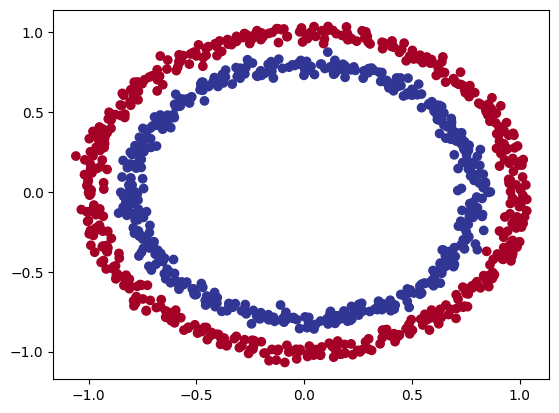

In [52]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [53]:
# Convert data to tensors and then to train and test splits
import torch

### 1.3.2. <a id='toc1_3_2_'></a>[Building a model with non-linearity](#toc0_)

* Linear = straight lines
* Non-linear = non-straight lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

In [96]:
# Build a model with non-linear activation funcitons

from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()  # 調用父類的構造函數
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [97]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()  # 二元分類用的Loss
optimizer = torch.optim.SGD(model_3.parameters(),lr=0.1)

### 1.3.3. <a id='toc1_3_3_'></a>[Training a model with non-linearity](#toc0_)

In [98]:
len(X_test), len(y_test)

(200, 200)

In [99]:
# Random seeds
'''
當您在 PyTorch 中使用 GPU 加速訓練模型時，隨機數生成可能會對您的結果產生影響。
因為 GPU 計算單元的並行性和隨機數生成算法的實現方式可能會導致不同的運算序列和隨機數生成序列。
因此，為了確保每次運行時都得到相同的結果，您可以使用 torch.cuda.manual_seed() 方法設置 CUDA 隨機種子，
以確保在 GPU 上生成的隨機數也是相同的。
'''
torch.manual_seed(42)
torch.cuda.manual_seed(42) # 設置 CUDA 隨機種子，以確保在 GPU 上運行時生成的隨機數也是相同的

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 10000

for epoch in range(epochs):
    ### Training
    model_3.train()

    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
    acc = accuracy_fn(y_true=y_train,
                        y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()   # 在 PyTorch 中，當您使用反向傳播算法更新模型的權重和偏差時，您需要在每個訓練迭代之前先清除之前的梯度。

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, 
                            y_pred=test_pred)
        
    # Print out what's this happenin'
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")
        


Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.6932, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test Loss: 0.6910, Test Acc: 52.50%
Epoch: 200 | Loss: 0.6898, Acc: 53.37% | Test Loss: 0.6894, Test Acc: 55.00%
Epoch: 300 | Loss: 0.6879, Acc: 53.00% | Test Loss: 0.6872, Test Acc: 56.00%
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test Loss: 0.6841, Test Acc: 56.50%
Epoch: 500 | Loss: 0.6810, Acc: 52.75% | Test Loss: 0.6794, Test Acc: 56.50%
Epoch: 600 | Loss: 0.6751, Acc: 54.50% | Test Loss: 0.6729, Test Acc: 56.00%
Epoch: 700 | Loss: 0.6666, Acc: 58.38% | Test Loss: 0.6632, Test Acc: 59.00%
Epoch: 800 | Loss: 0.6516, Acc: 64.00% | Test Loss: 0.6476, Test Acc: 67.50%
Epoch: 900 | Loss: 0.6236, Acc: 74.00% | Test Loss: 0.6215, Test Acc: 79.00%
Epoch: 1000 | Loss: 0.5682, Acc: 87.75% | Test Loss: 0.5738, Test Acc: 86.50%
Epoch: 1100 | Loss: 0.4815, Acc: 93.50% | Test Loss: 0.4993, Test Acc: 90.50%
Epoch: 1200 | Loss: 0.3706, Acc: 97.75% | Test Loss: 0.4059, Test Acc: 92.00

### 1.3.4. <a id='toc1_3_4_'></a>[Evaluating a model trained with non-linear activation functions](#toc0_)

In [100]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

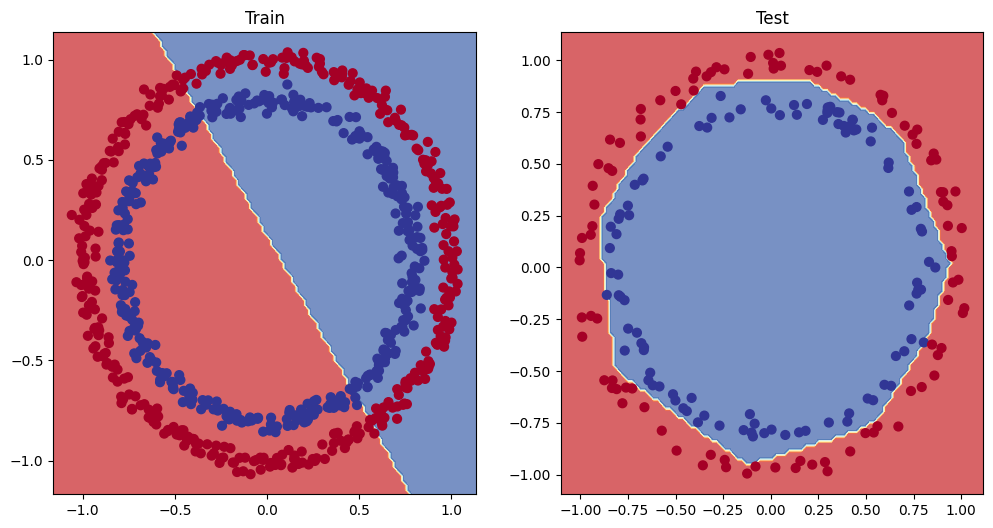

In [101]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

**Challenge:** Can you improve model_3 to do better than 80% accuracy on the test data?

### 1.3.5. <a id='toc1_3_5_'></a>[Replicating non-linear activation functions](#toc0_)

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.

In [103]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype, A

(torch.float32,
 tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]))

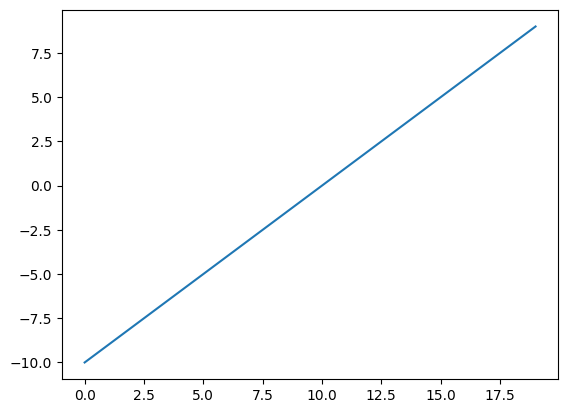

In [104]:
# Visualize the tensor
plt.plot(A); 

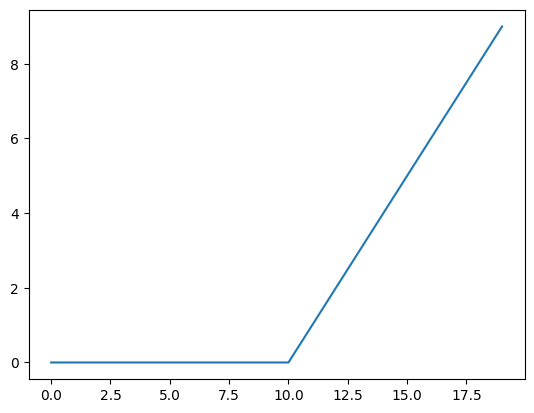

In [105]:
plt.plot(torch.relu(A));

In [109]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x) # inputs must be tensors
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

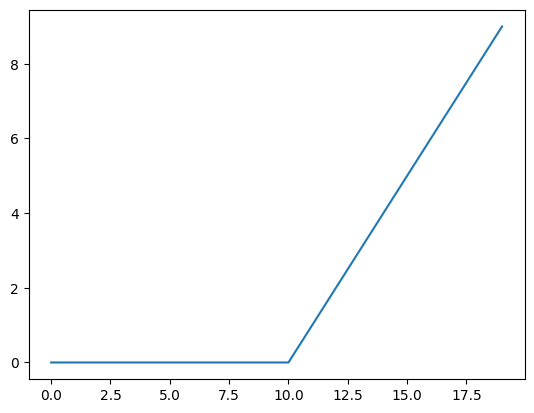

In [110]:
# Plot ReLU activation function
plt.plot(relu(A)); 

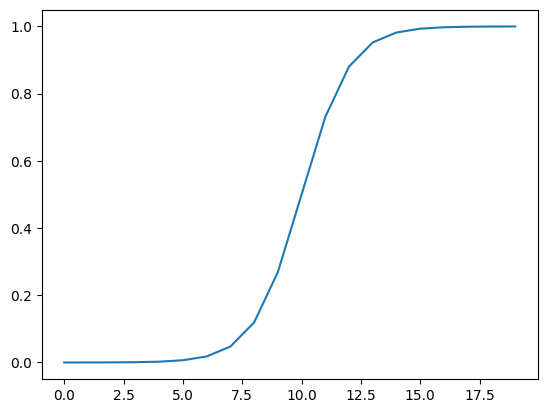

In [112]:
# Now let's do the same for Sigmoid = https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid 
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))
plt.plot(torch.sigmoid(A)); 

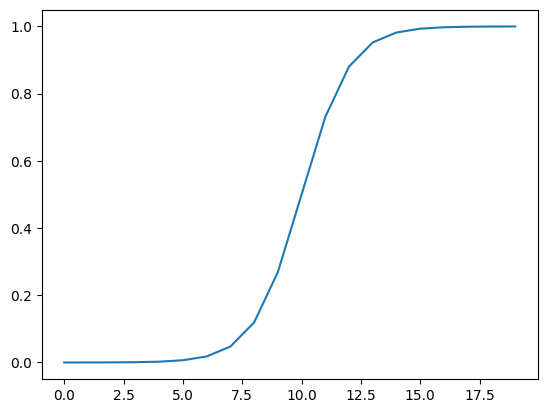

In [113]:
plt.plot(sigmoid(A));

## 1.4. <a id='toc1_4_'></a>[Putting it all together with a multi-class classification problem](#toc0_)

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

### 1.4.1. <a id='toc1_4_1_'></a>[Creating a toy multi-class dataset](#toc0_)

[[-8.41339595  6.93516545]
 [-5.76648413 -6.43117072]
 [-6.04213682 -6.76610151]
 [ 3.95083749  0.69840313]
 [ 4.25049181 -0.28154475]] [3 2 2 1 1]
tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


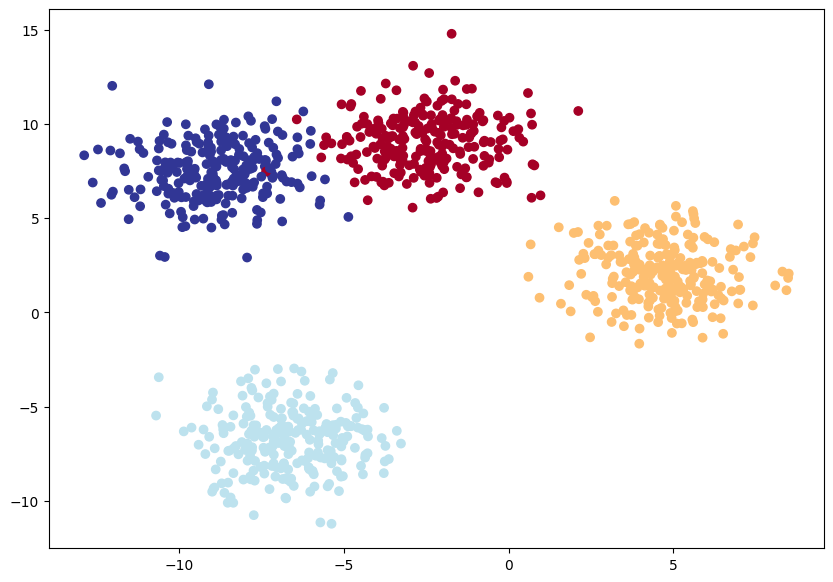

In [125]:
# Import dependencies 
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs 
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42


# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)
print(X_blob[:5], y_blob[:5])

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2, 
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);



### 1.4.2. <a id='toc1_4_2_'></a>[Building a multi-class classification model in PyTorch](#toc0_)

In [126]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [146]:
# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi-class classification model.

        Args:
            input_features (int): Number of input features to the model
            output_features (int): Number of outputs features (number of output classes)
            hidden_units (int): Number of hidden units between layers, default 8

        Returns:

        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
            
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [147]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [148]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 1.4.3. <a id='toc1_4_3_'></a>[Create a loss function and an optimizer for a multi-class classification model](#toc0_)

In [149]:
# Create a loss function for multi-class classification - loss function measures how wrong our model's predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(), 
                            lr=0.1) # learning rate is a hyperparameter you can change

### 1.4.4. <a id='toc1_4_4_'></a>[Getting prediction probabilities for a multi-class PyTorch model](#toc0_)

In order to evaluate and train and test our model, we need to convert our model's outputs (logtis) to predicition probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)

In [150]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[ 0.4360, -0.2618, -0.1064,  0.1442],
        [ 0.0474, -0.9387, -0.4596, -0.0438],
        [ 0.0039, -1.1604, -0.6468,  0.3537],
        [ 0.4114, -0.2208, -0.0243,  0.1781],
        [ 0.2839, -0.6175, -0.3745,  0.0810],
        [ 0.0189, -1.0274, -0.5459, -0.0609],
        [ 0.0268, -1.1117, -0.6128,  0.3207],
        [ 0.1638, -0.7901, -0.4107,  0.0460],
        [-0.0280, -1.1786, -0.6808,  0.4976],
        [ 0.2113, -0.7195, -0.3923,  0.0607]], device='cuda:0')

In [151]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [153]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)  # 將值全部變成 0~1
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.4360, -0.2618, -0.1064,  0.1442],
        [ 0.0474, -0.9387, -0.4596, -0.0438],
        [ 0.0039, -1.1604, -0.6468,  0.3537],
        [ 0.4114, -0.2208, -0.0243,  0.1781],
        [ 0.2839, -0.6175, -0.3745,  0.0810]], device='cuda:0')
tensor([[0.3539, 0.1761, 0.2057, 0.2643],
        [0.3462, 0.1292, 0.2085, 0.3161],
        [0.3075, 0.0960, 0.1604, 0.4362],
        [0.3367, 0.1789, 0.2178, 0.2666],
        [0.3650, 0.1482, 0.1889, 0.2979]], device='cuda:0')


In [154]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3,
        3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3,
        3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
        3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0,
        3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0,
        0, 0, 3, 0, 0, 0, 3, 0], device='cuda:0')

In [155]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 1.4.5. <a id='toc1_4_5_'></a>[Creating a training loop and testing loop for a multi-class PyTorch model](#toc0_)

In [156]:
y_blob_train.dtype

torch.int64

In [163]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs 
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
    ### Training 
    model_4.train()

    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test,
                            y_pred=test_preds)

    # Print out what's happenin'
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.4282, Acc: 25.62% | Test loss: 1.2978, Test acc: 44.00%
Epoch: 10 | Loss: 0.8020, Acc: 68.62% | Test loss: 0.7026, Test acc: 78.50%
Epoch: 20 | Loss: 0.5443, Acc: 80.00% | Test loss: 0.4713, Test acc: 87.50%
Epoch: 30 | Loss: 0.3654, Acc: 95.38% | Test loss: 0.3083, Test acc: 97.00%
Epoch: 40 | Loss: 0.2504, Acc: 99.00% | Test loss: 0.2053, Test acc: 99.00%
Epoch: 50 | Loss: 0.1703, Acc: 99.12% | Test loss: 0.1373, Test acc: 99.50%
Epoch: 60 | Loss: 0.1144, Acc: 99.25% | Test loss: 0.0911, Test acc: 99.50%
Epoch: 70 | Loss: 0.0799, Acc: 99.25% | Test loss: 0.0632, Test acc: 99.50%
Epoch: 80 | Loss: 0.0609, Acc: 99.25% | Test loss: 0.0476, Test acc: 99.50%
Epoch: 90 | Loss: 0.0501, Acc: 99.25% | Test loss: 0.0386, Test acc: 99.50%


### 1.4.6. <a id='toc1_4_6_'></a>[Making and evaluating predictions with a PyTorch multi-class model](#toc0_)

In [164]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  1.8424,   5.4191,  -2.7800,  -1.7850],
        [ -0.8053,  -5.0636,  -2.3239,   4.5872],
        [ -8.4690,  -1.0463,   7.3038,   0.1048],
        [  0.4784,   3.8518,  -1.1141,  -1.2340],
        [  5.7714,   1.5627,  -7.4664,  -0.2754],
        [ -1.5434,  -6.4669,  -2.1827,   5.7430],
        [ -7.5435,   0.8443,   6.7050,  -1.0873],
        [  5.5088,  -0.0455,  -7.1803,   0.2934],
        [-10.4454,  -3.6512,   8.7182,   1.6771],
        [  5.5721,   0.4348,  -7.1957,   0.0999]], device='cuda:0')

In [165]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.7182e-02, 9.7183e-01, 2.6718e-04, 7.2260e-04],
        [4.5249e-03, 6.4015e-05, 9.9110e-04, 9.9442e-01],
        [1.4110e-07, 2.3614e-04, 9.9902e-01, 7.4659e-04],
        [3.2722e-02, 9.5472e-01, 6.6564e-03, 5.9042e-03],
        [9.8306e-01, 1.4613e-02, 1.7517e-06, 2.3253e-03],
        [6.8406e-04, 4.9759e-06, 3.6098e-04, 9.9895e-01],
        [6.4645e-07, 2.8400e-03, 9.9675e-01, 4.1156e-04],
        [9.9078e-01, 3.8352e-03, 3.0562e-06, 5.3821e-03],
        [4.7529e-09, 4.2427e-06, 9.9912e-01, 8.7440e-04],
        [9.9002e-01, 5.8148e-03, 2.8227e-06, 4.1600e-03]], device='cuda:0')

In [166]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

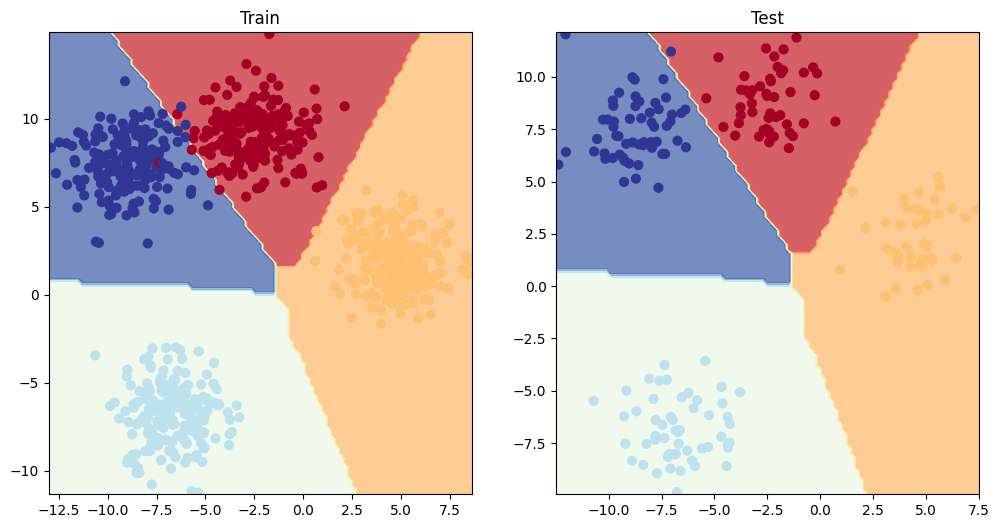

In [167]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### 1.4.7. <a id='toc1_4_7_'></a>[A few more classification metrics... (to evaluate our classification model)](#toc0_)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall 
* F1-score
* Confusion matrix
* Classification report

See this article for when to use precision/recall - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

If you want access to a lot of PyTorch metrics, see TorchMetrics - https://torchmetrics.readthedocs.io/en/latest/ 

In [168]:
!pip install torchmetrics

In [175]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculuate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

In [176]:
torchmetric_accuracy.device

device(type='cuda', index=0)

## 1.5. <a id='toc1_5_'></a>[Exercises & Extra-curriculum](#toc0_)

See exercises and extra-curriculum here: https://www.learnpytorch.io/02_pytorch_classification/#exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be right just try writing code that suffices the question.

In [196]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# Setup random seed
RANDOM_SEED = 42

cuda


### 1.5.1. <a id='toc1_5_1_'></a>Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.          [&#8593;](#toc0_)
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors. 
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [321]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=42)

X[:5], y[:5]

(array([[-0.11166654,  0.52022374],
        [ 1.14264982, -0.34257734],
        [ 0.79555796, -0.01144231],
        [ 0.11182668, -0.55193153],
        [-0.81646618,  0.54399604]]),
 array([1, 1, 1, 1, 0]))

In [322]:
# Turn data into a DataFrame
import pandas as pd
moons = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label":y})

moons.head(10)

,X1,X2,label
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0
5,0.662510,-0.084356,1
6,0.274510,-0.189904,1
7,-0.115556,0.535912,1
8,1.572369,-0.335447,1
9,0.763990,0.962359,0


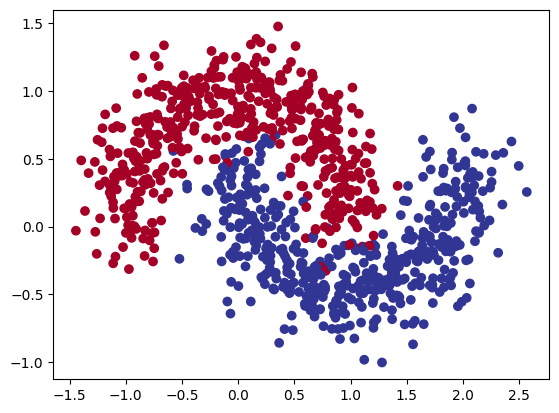

In [323]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], 
            y=X[:,1], 
            c=y, 
            cmap=plt.cm.RdYlBu)

In [324]:
# Turn data into tensors of dtype float
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print(type(X[:5]), type(y[:5]))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [325]:
# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1.5.1.1. <a id='toc1_5_1_1_'></a>[Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.](#toc0_)
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [326]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi-class classification model.

        Args:
            input_features (int): Number of input features to the model
            output_features (int): Number of outputs features (number of output classes)
            hidden_units (int): Number of hidden units between layers, default 8

        Returns:

        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )


    def forward(self, x):
        return self.linear_layer_stack(x)

# Instantiate the model
moon_model = MoonModelV0(input_features=2,
                    output_features=1,
                    hidden_units=16).to(device)
moon_model

MoonModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [327]:
moon_model.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007]], device='cuda:0')),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5459,  0.1177, -0.2296,  0.4370,  0.1102,  0.5713,  0.0773, -0.2230,
                       0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265],
                     device='cu

#### 1.5.1.2. <a id='toc1_5_1_2_'></a>[Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.](#toc0_)

In [328]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.Adam(params=moon_model.parameters(), lr=0.1)

#### 1.5.1.3. <a id='toc1_5_1_3_'></a>[Create a training and testing loop to fit the model you created in 2 to the data you created in 1.](#toc0_)
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [329]:
# What's coming out of our model?
moon_model.eval()

# logits (raw outputs of model)
with torch.inference_mode():
    Logits = moon_model(X_train.to(device)).squeeze()
print("Logits:", Logits[:5])

# Prediction probabilities
probs = torch.sigmoid(Logits)
print("Pred probs:", probs[:5])


# Prediction labels
preds = torch.round(torch.sigmoid(Logits))
print("Pred labels:", preds[:5])

Logits: tensor([-0.2387, -0.1667, -0.2019, -0.2040, -0.1678], device='cuda:0')
Pred probs: tensor([0.4406, 0.4584, 0.4497, 0.4492, 0.4581], device='cuda:0')
Pred labels: tensor([0., 0., 0., 0., 0.], device='cuda:0')


In [330]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

# num_classes=2 = Binary classes
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn(y_train.to(device), preds)

tensor(0.5000, device='cuda:0')

In [331]:
torch.manual_seed(42)

# Setup epochs
epochs = 1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  moon_model.train()

  # 1. Forward pass (logits output)
  
  # Turn logits into prediction probabilities
  y_logits = moon_model(X_train).squeeze()

  # Turn prediction probabilities into prediction labels
  y_pred = torch.round(torch.sigmoid(y_logits))   # turn logits -> pred probs -> pre labels

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
  optimizer.step()

  ### Testing
  moon_model.eval() 
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    
    # Turn the test logits into prediction labels
    test_logits = moon_model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))   # turn logits -> pred probs -> pre labels

    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                          y_pred=test_preds)

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")
    

Epoch: 0 | Loss: 0.6943, Acc: 0.50% | Test loss: 0.5898, Test acc: 81.00%


Epoch: 100 | Loss: 0.0569, Acc: 0.98% | Test loss: 0.0401, Test acc: 98.50%
Epoch: 200 | Loss: 0.0536, Acc: 0.98% | Test loss: 0.0440, Test acc: 98.00%
Epoch: 300 | Loss: 0.0528, Acc: 0.98% | Test loss: 0.0420, Test acc: 98.50%
Epoch: 400 | Loss: 0.0511, Acc: 0.98% | Test loss: 0.0407, Test acc: 98.50%
Epoch: 500 | Loss: 0.0501, Acc: 0.98% | Test loss: 0.0472, Test acc: 98.00%
Epoch: 600 | Loss: 0.0490, Acc: 0.98% | Test loss: 0.0394, Test acc: 98.50%
Epoch: 700 | Loss: 0.0488, Acc: 0.98% | Test loss: 0.0367, Test acc: 99.00%
Epoch: 800 | Loss: 0.0491, Acc: 0.98% | Test loss: 0.0457, Test acc: 98.00%
Epoch: 900 | Loss: 0.0490, Acc: 0.98% | Test loss: 0.0333, Test acc: 98.50%


#### 1.5.1.4. <a id='toc1_5_1_4_'></a>[Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.](#toc0_)

In [332]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

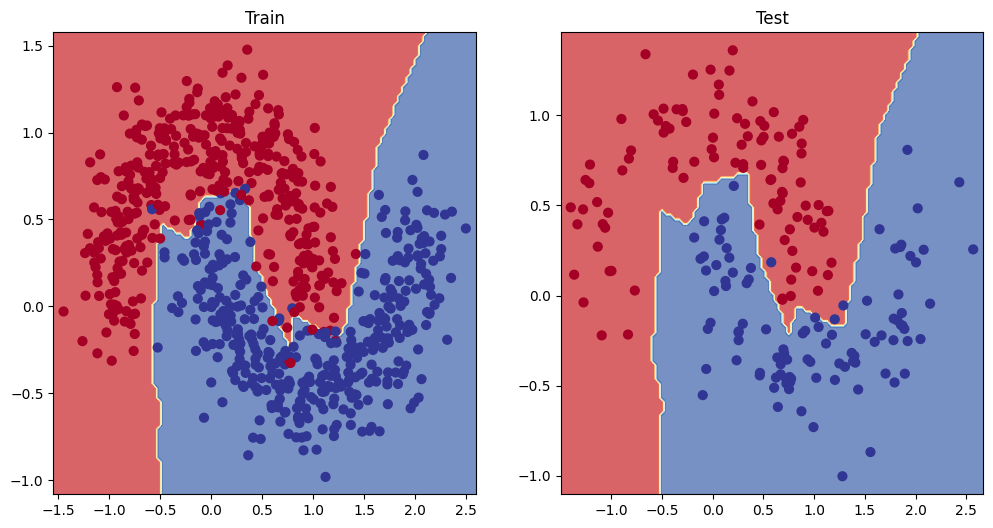

In [333]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(moon_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(moon_model, X_test, y_test) 

### 1.5.2. <a id='toc1_5_2_'></a>[Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.](#toc0_)
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

tensor([-5.0000, -4.8990, -4.7980, -4.6970, -4.5960, -4.4949, -4.3939, -4.2929,
        -4.1919, -4.0909, -3.9899, -3.8889, -3.7879, -3.6869, -3.5859, -3.4848,
        -3.3838, -3.2828, -3.1818, -3.0808, -2.9798, -2.8788, -2.7778, -2.6768,
        -2.5758, -2.4747, -2.3737, -2.2727, -2.1717, -2.0707, -1.9697, -1.8687,
        -1.7677, -1.6667, -1.5657, -1.4646, -1.3636, -1.2626, -1.1616, -1.0606,
        -0.9596, -0.8586, -0.7576, -0.6566, -0.5556, -0.4545, -0.3535, -0.2525,
        -0.1515, -0.0505,  0.0505,  0.1515,  0.2525,  0.3535,  0.4545,  0.5556,
         0.6566,  0.7576,  0.8586,  0.9596,  1.0606,  1.1616,  1.2626,  1.3636,
         1.4646,  1.5657,  1.6667,  1.7677,  1.8687,  1.9697,  2.0707,  2.1717,
         2.2727,  2.3737,  2.4747,  2.5758,  2.6768,  2.7778,  2.8788,  2.9798,
         3.0808,  3.1818,  3.2828,  3.3838,  3.4848,  3.5859,  3.6869,  3.7879,
         3.8889,  3.9899,  4.0909,  4.1919,  4.2929,  4.3939,  4.4949,  4.5960,
         4.6970,  4.7980,  4.8990,  5.00

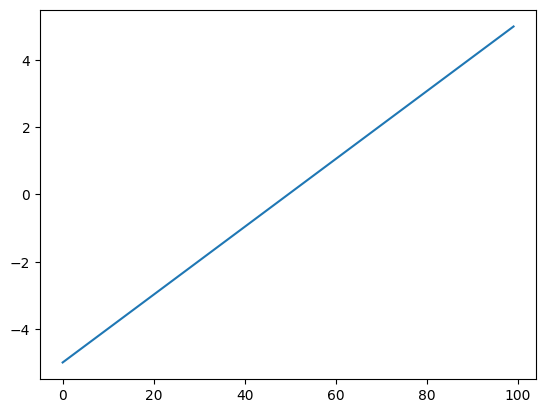

In [339]:
# Create a straight line tensor

# Create a tensor with values between -5 and 5
x = torch.linspace(-5, 5, 100)

# Print the tensor
print(x)

plt.plot(x)

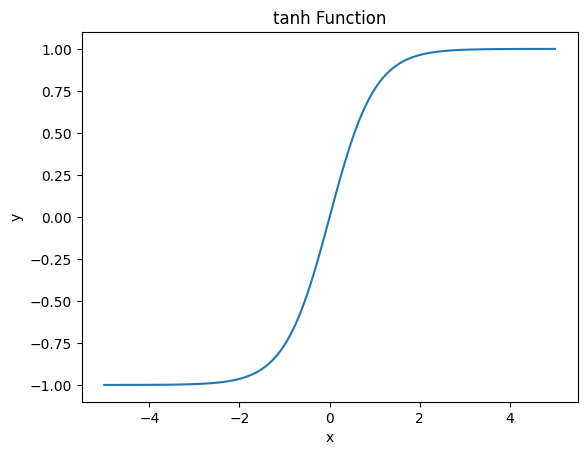

In [337]:
# Test torch.tanh() on the tensor and plot it

# Apply the tanh function to the tensor
y = torch.tanh(x)

# Plot the tensor
plt.plot(x.numpy(), y.numpy())
plt.title('tanh Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

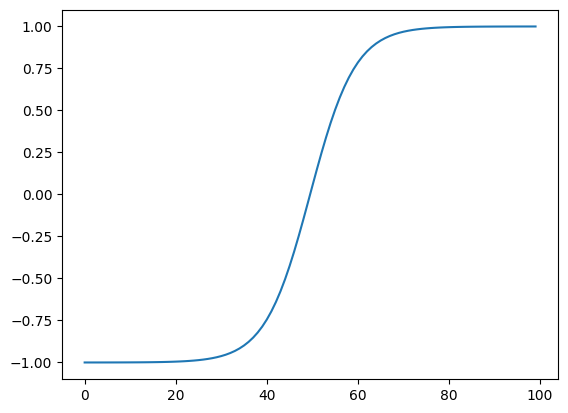

In [341]:
# Replicate torch.tanh() and plot it

def tanh(x):
    # Source - https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.plot(tanh(x))

### 1.5.3. <a id='toc1_5_3_'></a>Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).          [&#8593;](#toc0_)
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

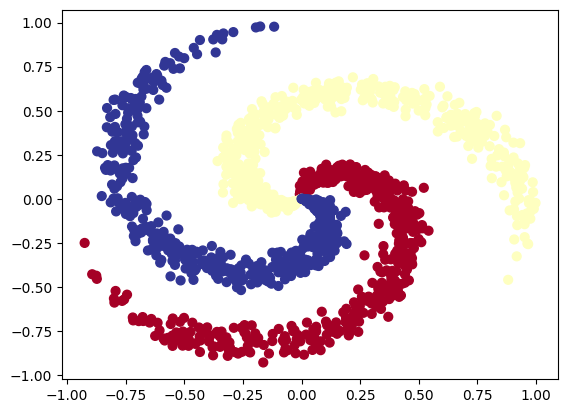

In [371]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 500 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [372]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [373]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn

MulticlassAccuracy()

In [374]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [375]:
# Create model by subclassing nn.Module
class multi_class_model(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi-class classification model.

        Args:
            input_features (int): Number of input features to the model
            output_features (int): Number of outputs features (number of output classes)
            hidden_units (int): Number of hidden units between layers, default 8

        Returns:

        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )


    def forward(self, x):
        return self.linear_layer_stack(x)       


# Instantiate model and send it to device
model_spiral = multi_class_model(input_features=2,
                    output_features=3,
                    hidden_units=16).to(device)
model_spiral

multi_class_model(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=3, bias=True)
  )
)

In [376]:
# Setup data to be device agnostic
model_spiral.eval()
with torch.inference_mode():
    y_logits = model_spiral(X_test.to(device))

# Print out first 10 untrained model outputs (forward pass)
print("Logits:", y_logits[:5])

probs = torch.softmax(y_logits, dim=1)
print("Pred probs:", probs[:5])
## Your code here ##

preds = probs.argmax(dim=1)
print("Pred labels:", preds[:5])

Logits: tensor([[-0.4007, -0.0507,  0.2002],
        [-0.4100, -0.0773,  0.1161],
        [-0.3794, -0.0509,  0.1681],
        [-0.3990, -0.0556,  0.1644],
        [-0.4233, -0.0664,  0.1539]], device='cuda:0')
Pred probs: tensor([[0.2357, 0.3345, 0.4299],
        [0.2447, 0.3413, 0.4141],
        [0.2428, 0.3373, 0.4199],
        [0.2400, 0.3384, 0.4216],
        [0.2375, 0.3394, 0.4231]], device='cuda:0')
Pred labels: tensor([2, 2, 2, 2, 2], device='cuda:0')


In [377]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_spiral.parameters(), 
                            lr=0.1)

In [378]:
# Build a training loop for the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs 
epochs = 1000

# Put data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop over data
for epoch in range(epochs):
  ## Training
  model_spiral.train()
  
  # 1. Forward pass
  y_logits = model_spiral(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)  # loss = compare model raw outputs to desired model outputs
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)  # the accuracy function needs to compare pred
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model_spiral.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = model_spiral(X_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
    
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                        y_pred=test_preds)
    
  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")
  

Epoch: 0 | Loss: 1.1393, Acc: 32.50% | Test loss: 1.0813, Test acc: 42.00%
Epoch: 100 | Loss: 0.0263, Acc: 99.17% | Test loss: 0.0527, Test acc: 98.67%
Epoch: 200 | Loss: 0.0124, Acc: 99.67% | Test loss: 0.0657, Test acc: 99.00%
Epoch: 300 | Loss: 0.0071, Acc: 99.83% | Test loss: 0.0758, Test acc: 99.00%
Epoch: 400 | Loss: 0.0051, Acc: 99.92% | Test loss: 0.0809, Test acc: 99.00%
Epoch: 500 | Loss: 0.0043, Acc: 99.92% | Test loss: 0.0841, Test acc: 99.00%
Epoch: 600 | Loss: 0.0039, Acc: 99.92% | Test loss: 0.0835, Test acc: 99.33%
Epoch: 700 | Loss: 0.0036, Acc: 99.92% | Test loss: 0.0833, Test acc: 99.33%
Epoch: 800 | Loss: 0.0031, Acc: 99.92% | Test loss: 0.0847, Test acc: 99.33%
Epoch: 900 | Loss: 0.0028, Acc: 99.92% | Test loss: 0.0876, Test acc: 99.33%


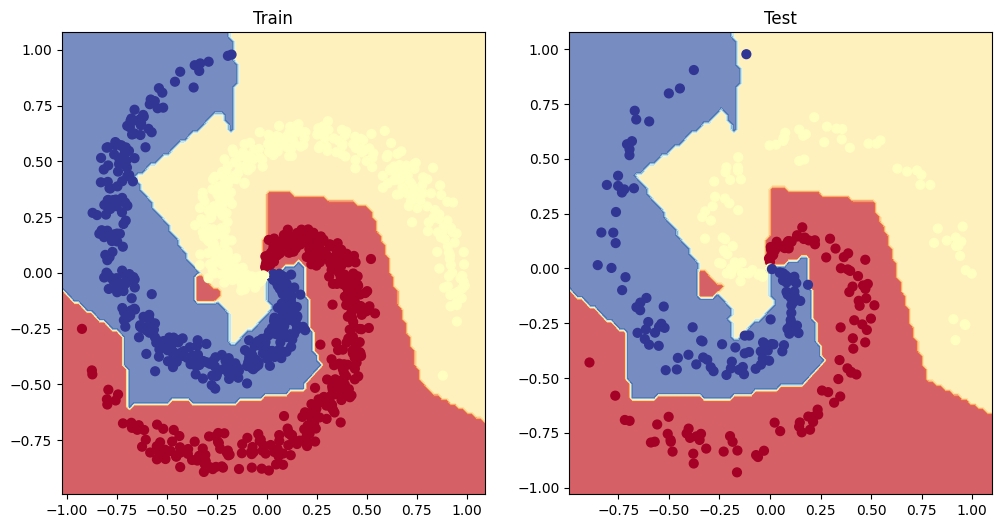

In [379]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_spiral, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_spiral, X_test, y_test)